In [252]:
import numpy as np
import matplotlib.pyplot as plt
import os

from openquake.hazardlib.const import TRT
from openquake.hazardlib.source.area import AreaSource
from openquake.hazardlib.mfd import TruncatedGRMFD
from openquake.hazardlib.scalerel import WC1994
from openquake.hazardlib.tom import PoissonTOM
from openquake.hazardlib.pmf import PMF
from openquake.hazardlib.geo import Point, Polygon, NodalPlane
from openquake.hazardlib.source import BaseRupture, NonParametricSeismicSource, ParametricProbabilisticRupture
from openquake.hazardlib.sourcewriter import write_source_model

from scipy.stats import linregress

In [193]:
# set everything for the mfd
min_mag = 5.0
max_mag = 5.1
bin_width = 0.1 #0.1
a_val = 3.0
b_val = 1.0
mfd = TruncatedGRMFD(min_mag, max_mag, bin_width, a_val, b_val)

In [172]:
#create nodal plane
max_angle_strike = 180
pas = 25

nodalplanes = []
number_orientation = list(range(0, max_angle_strike, pas))

for e in number_orientation: 
    nodalplanes.append(((1/len(number_orientation)), NodalPlane(strike=e, dip=90.0, rake=0.0)))


In [173]:
nodalplanes = [(1, NodalPlane(strike=45, dip=90.0, rake=0.0))]

In [174]:
#set everything for the area source
source_id = '05'
name = 'Aleatoepist'
tectonic_region_type = TRT.ACTIVE_SHALLOW_CRUST
mfd = mfd # MDF
rupture_mesh_spacing = 1.0 #it change a thinks that i dont know (weird change about fault on the bottom right (was 1)
msr = WC1994() #scalling relationship
rupture_aspect_ratio = 1 #aspect ratio (move the strike)
tom = PoissonTOM(1.0) # ?? Erased the rupture in the bottom right ???? If the number is one, there are some problem on bottom right
upper_seismogenic_depth = 0.0 #Seismogenic setting
lower_seismogenic_depth = 15.0 #Seismogenic setting
nodal_plane_distribution = PMF(nodalplanes) #that a discrete random variable is exactly equal to some value.
#I think this is the proba to have one or the other nodal plane ? 
hypocenter_distribution = PMF([(1.0, 5.0)]) # So you can decide the proba of the hypocenter to be this value or an other (weight) 
#-5.0000000E-01 -5.0000000E-01 -3.0000000E-01 -1.0000000E-01 1.0000000E-01 2.0000000E-01 3.0000000E-01 -8.0000000E-01
polygon = Polygon([Point(-0.5, -0.5), Point(-0.5, 0.5), #Set the area
                   Point(0.5, 0.5), Point(0.5, -0.5)])
#polygon = Polygon([Point(-0.5, -0.5), Point(-0.3, -0.1), #Set the area
#                   Point(0.1, 0.2), Point(0.3, -0.8)])
area_discretization = 10.0  #Descretization of the space. More the number will be high, higher the space will be between each fault

In [175]:
src = AreaSource(source_id, name, tectonic_region_type, mfd, #Create the AreaSource
                 rupture_mesh_spacing, msr, rupture_aspect_ratio,
                 tom, upper_seismogenic_depth, lower_seismogenic_depth,
                 nodal_plane_distribution, hypocenter_distribution,
                 polygon, area_discretization)

In [181]:
rup.occurrence_rate

2.139879436315454e-07

In [176]:
data = []

for rup in src.iter_ruptures(): #Take all the information needed in the AreaSource 
    mag = rup.mag
    rake = rup.rake
    trt = rup.tectonic_region_type
    hypocenter = rup.hypocenter
    surface = rup.surface
    prob_n0 = np.exp(-rup.occurrence_rate)
    prob_n1 = 1 - prob_n0
    pmf = PMF([(prob_n0, 0.0), (prob_n1, 1.0)]) #Set the probability of the 2 input
    brup = BaseRupture(mag, rake, trt, hypocenter, surface) #Baserupture
    data.append((brup, pmf))


In [177]:
np_src = NonParametricSeismicSource('05', 'Aleatoepist', tectonic_region_type, data) #Non Parametric Seismic Source explicitly defines earthquake 
#ruptures in the constructor. 

In [178]:
#_ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/source.xml', [src],investigation_time=1)
_ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/test.xml', [np_src],investigation_time=1)

In [179]:
fname = 'test.xyz'

# Vérifier si le fichier existe et le supprimer s'il existe
if os.path.isfile(fname):
    os.remove(fname)
    
fou = open(fname, 'w')

fou.write('>\n')
for dat in data[:5]:
    mesh = dat[0].surface.mesh
    #if zip(mesh.
    for lo, la, de in zip(mesh.lons, mesh.lats, mesh. depths):
        fou.write(f'{lo:.6f} {la:.6f} {de:.6f}\n')
    fou.write('>\n')
fou.close()

In [180]:
%%bash
region=-1/1/-1/1
#region=-0.5/0.5/-0.5/0.5
gmt begin test
    gmt basemap -R$region -JM6i -B
	gmt plot test.xyz -Wthin,black
gmt end show

In [143]:
#create nodal plane
max_angle_strike = 180
pas = 25

nodalplanes = []
number_orientation = list(range(0, max_angle_strike, pas))

for e in number_orientation: 
    #set everything for the area source
    source_id = '05'
    name = 'Aleatoepist'
    tectonic_region_type = TRT.ACTIVE_SHALLOW_CRUST
    mfd = mfd # MDF
    rupture_mesh_spacing = 1.0 #it change a thinks that i dont know (weird change about fault on the bottom right (was 1)
    msr = WC1994() #scalling relationship
    rupture_aspect_ratio = 1 #aspect ratio (move the strike)
    tom = PoissonTOM(1.0) # ?? Erased the rupture in the bottom right ???? If the number is one, there are some problem on bottom right
    upper_seismogenic_depth = 0.0 #Seismogenic setting
    lower_seismogenic_depth = 15.0 #Seismogenic setting
    nodal_plane_distribution = PMF([(1, NodalPlane(strike=e, dip=90.0, rake=0.0))]) #that a discrete random variable is exactly equal to some value.
    #I think this is the proba to have one or the other nodal plane ? 
    hypocenter_distribution = PMF([(1.0, 5.0)]) # So you can decide the proba of the hypocenter to be this value or an other (weight) 
    #-5.0000000E-01 -5.0000000E-01 -3.0000000E-01 -1.0000000E-01 1.0000000E-01 2.0000000E-01 3.0000000E-01 -8.0000000E-01
    polygon = Polygon([Point(-0.5, -0.5), Point(-0.5, 0.5), #Set the area
                       Point(0.5, 0.5), Point(0.5, -0.5)])
    #polygon = Polygon([Point(-0.5, -0.5), Point(-0.3, -0.1), #Set the area
    #                   Point(0.1, 0.2), Point(0.3, -0.8)])
    area_discretization = 10.0  #Descretization of the space. More the number will be high, higher the space will be between each fault
    
    src = AreaSource(source_id, name, tectonic_region_type, mfd, #Create the AreaSource
                     rupture_mesh_spacing, msr, rupture_aspect_ratio,
                     tom, upper_seismogenic_depth, lower_seismogenic_depth,
                     nodal_plane_distribution, hypocenter_distribution,
                     polygon, area_discretization)
    
    data = []
    
    for rup in src.iter_ruptures(): #Take all the information needed in the AreaSource 
        mag = rup.mag
        rake = rup.rake
        trt = rup.tectonic_region_type
        hypocenter = rup.hypocenter
        surface = rup.surface
        prob_n0 = np.exp(-rup.occurrence_rate)
        prob_n1 = 1 - prob_n0
        pmf = PMF([(prob_n0, 0.0), (prob_n1, 1.0)]) #Set the probability of the 2 input
        brup = BaseRupture(mag, rake, trt, hypocenter, surface) #Baserupture
        data.append((brup, pmf))
    
    np_src = NonParametricSeismicSource('05', 'Aleatoepist', tectonic_region_type, data) #Non Parametric Seismic Source explicitly defines earthquake 
    #ruptures in the constructor. 
    
    #_ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/source.xml', [src],investigation_time=1)
    _ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/aleatoepiste/test'+str(e)+'.xml', [np_src],investigation_time=1)

In [108]:
fname = 'test.xyz'

# Vérifier si le fichier existe et le supprimer s'il existe
if os.path.isfile(fname):
    os.remove(fname)
    
fou = open(fname, 'w')

fou.write('>\n')
for dat in data[:]:
    mesh = dat[0].surface.mesh
    #if zip(mesh.
    for lo, la, de in zip(mesh.lons, mesh.lats, mesh. depths):
        fou.write(f'{lo:.6f} {la:.6f} {de:.6f}\n')
    fou.write('>\n')
fou.close()

In [109]:
%%bash
region=-1/1/-1/1
#region=-0.5/0.5/-0.5/0.5
gmt begin test
    gmt basemap -R$region -JM6i -B
	gmt plot test.xyz -Wthin,black
gmt end show

2.139879436315454e-07

## Adding previous with new notebook

In [396]:
#set everything for the mfd
min_mag = 5.0
max_mag = 7.0
bin_width = 0.1 #0.1
a_val = 3.0
b_val = 1.0
num_simulation = 10000
investigation_time = 475
degree = 150

mfd = TruncatedGRMFD(min_mag, max_mag, bin_width, a_val, b_val)

In [397]:
mag_occ = np.array(mfd.get_annual_occurrence_rates())
print(mag_occ[:, 1])

rec_int = 1 / mag_occ[:, 1]
print(np.array_str(rec_int, precision=1, suppress_small=True))

num_events = investigation_time / rec_int
print(np.array_str(num_events, precision=0, suppress_small=True))

rates = np.squeeze(mag_occ[:, 1]*investigation_time)
num_rups = np.random.poisson(rates, size=(num_simulation, 20))


sum_bin_num_rupts = np.sum(num_rups, axis=0)
probability = sum_bin_num_rupts/np.sum(sum_bin_num_rupts)
print(sum_num_rupts)
print(probability)

[2.05671765e-03 1.63370890e-03 1.29770111e-03 1.03080063e-03
 8.18794045e-04 6.50391229e-04 5.16624117e-04 4.10369123e-04
 3.25967781e-04 2.58925412e-04 2.05671765e-04 1.63370890e-04
 1.29770111e-04 1.03080063e-04 8.18794045e-05 6.50391229e-05
 5.16624117e-05 4.10369123e-05 3.25967781e-05 2.58925412e-05]
[  486.2   612.1   770.6   970.1  1221.3  1537.5  1935.6  2436.8  3067.8
  3862.1  4862.1  6121.   7705.9  9701.2 12213.1 15375.4 19356.4 24368.3
 30677.9 38621.2]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[91 89 55 45 33 31 23 20 18 14  7  5  5  3  7  2  1  1  2  1]
[0.20925268 0.16751205 0.13337983 0.10182602 0.08255136 0.06481951
 0.0507228  0.04207879 0.03138473 0.02593203 0.02136698 0.01661172
 0.01346268 0.00999662 0.00847493 0.00595993 0.0049032  0.00412123
 0.00285316 0.00278975]


In [398]:
#Here i divide sum_bin_num_rupts by num_simulation because i want to have the rate
rate_poisson = 1/(investigation_time/(sum_bin_num_rupts/num_simulation))

In [399]:
print(rate_poisson)

[2.08442105e-03 1.66863158e-03 1.32863158e-03 1.01431579e-03
 8.22315789e-04 6.45684211e-04 5.05263158e-04 4.19157895e-04
 3.12631579e-04 2.58315789e-04 2.12842105e-04 1.65473684e-04
 1.34105263e-04 9.95789474e-05 8.44210526e-05 5.93684211e-05
 4.88421053e-05 4.10526316e-05 2.84210526e-05 2.77894737e-05]


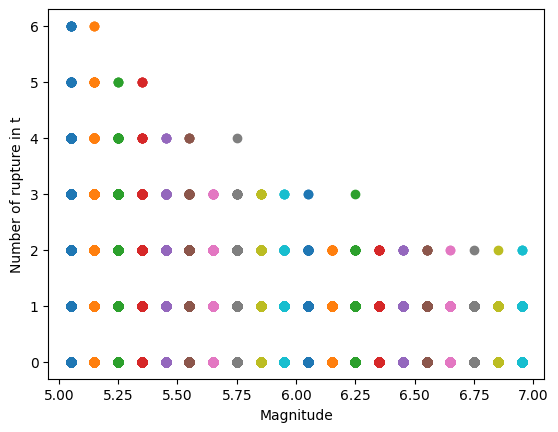

In [400]:
tmp = []
tmp2 = []
i = 0
for i_mag, mag in enumerate(mag_occ[:, 0]):
    tmp.append(np.ones_like(num_rups[:, i_mag]) * mag)
    tmp2.append(tmp[i][1])
    plt.plot(tmp[i], num_rups[:, i_mag], 'o')
    i=i+1
_ = plt.ylabel('Number of rupture in t')
_ = plt.xlabel('Magnitude')


In [401]:

#set everything for the area source
source_id = '06'
name = 'Aleatoepist'
tectonic_region_type = TRT.ACTIVE_SHALLOW_CRUST
mfd = mfd # MDF
rupture_mesh_spacing = 1.0 #it change a thinks that i dont know (weird change about fault on the bottom right (was 1)
msr = WC1994() #scalling relationship
rupture_aspect_ratio = 1 #aspect ratio (move the strike)
tom = PoissonTOM(1.0) # ?? Erased the rupture in the bottom right ???? If the number is one, there are some problem on bottom right
upper_seismogenic_depth = 0.0 #Seismogenic setting
lower_seismogenic_depth = 15.0 #Seismogenic setting
nodal_plane_distribution = PMF([(1, NodalPlane(strike=degree, dip=90.0, rake=0.0))]) #that a discrete random variable is exactly equal to some value.
#I think this is the proba to have one or the other nodal plane ? 
hypocenter_distribution = PMF([(1.0, 5.0)]) # So you can decide the proba of the hypocenter to be this value or an other (weight) 
#-5.0000000E-01 -5.0000000E-01 -3.0000000E-01 -1.0000000E-01 1.0000000E-01 2.0000000E-01 3.0000000E-01 -8.0000000E-01
polygon = Polygon([Point(-0.5, -0.5), Point(-0.5, 0.5), #Set the area
                   Point(0.5, 0.5), Point(0.5, -0.5)])
#polygon = Polygon([Point(-0.5, -0.5), Point(-0.3, -0.1), #Set the area
#                   Point(0.1, 0.2), Point(0.3, -0.8)])
area_discretization = 1.0  #Descretization of the space. More the number will be high, higher the space will be between each fault

src = AreaSource(source_id, name, tectonic_region_type, mfd, #Create the AreaSource
                 rupture_mesh_spacing, msr, rupture_aspect_ratio,
                 tom, upper_seismogenic_depth, lower_seismogenic_depth,
                 nodal_plane_distribution, hypocenter_distribution,
                 polygon, area_discretization)

data = []
i = 0

for rup in src.iter_ruptures(): #Take all the information needed in the AreaSource 
    mag = rup.mag
    rake = rup.rake
    trt = rup.tectonic_region_type
    hypocenter = rup.hypocenter
    surface = rup.surface
    if i == 19:
        i=0
    else :
        i+=1
    prob_n0 = np.exp(-rate_poisson[i])
    prob_n1 = 1 - prob_n0
    pmf = PMF([(prob_n0, 0.0), (prob_n1, 1.0)]) #Set the probability of the 2 input
    brup = BaseRupture(mag, rake, trt, hypocenter, surface) #Baserupture
    data.append((brup, pmf))


np_src = NonParametricSeismicSource('06', 'merging_two_notebook', tectonic_region_type, data) #Non Parametric Seismic Source explicitly defines earthquake 
#ruptures in the constructor. 

#_ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/source.xml', [src],investigation_time=1)
_ = write_source_model('C:/Users/domenge/oq-engine/demos/hazard/NonparametricSourcesClassicalPSHA/test/merging_two_notebook/np_source'+str(degree)+'_merging_two_notebook.xml', [np_src],investigation_time=investigation_time)

In [395]:
fname = 'test.xyz'

# Vérifier si le fichier existe et le supprimer s'il existe
if os.path.isfile(fname):
    os.remove(fname)
    
fou = open(fname, 'w')

fou.write('>\n')
for dat in data[:]:
    mesh = dat[0].surface.mesh
    #if zip(mesh.
    for lo, la, de in zip(mesh.lons, mesh.lats, mesh. depths):
        fou.write(f'{lo:.6f} {la:.6f} {de:.6f}\n')
    fou.write('>\n')
fou.close()

In [382]:
%%bash
region=-1/1/-1/1
#region=-0.5/0.5/-0.5/0.5
gmt begin test
    gmt basemap -R$region -JM6i -B
	gmt plot test.xyz -Wthin,black
gmt end show